UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Primeira avaliação - Atividade 1 - Período: 2021.1 - Professor: Saulo O. D. Luiz

**Nome: Filipe Soares Donato**

**Matrícula: 120111402**

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [1]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

     |████████████████████████████████| 339 kB 8.7 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=66c28d2c2a131ef0732631627ea58a3f1500c88aad28b01482fa1772520de001
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


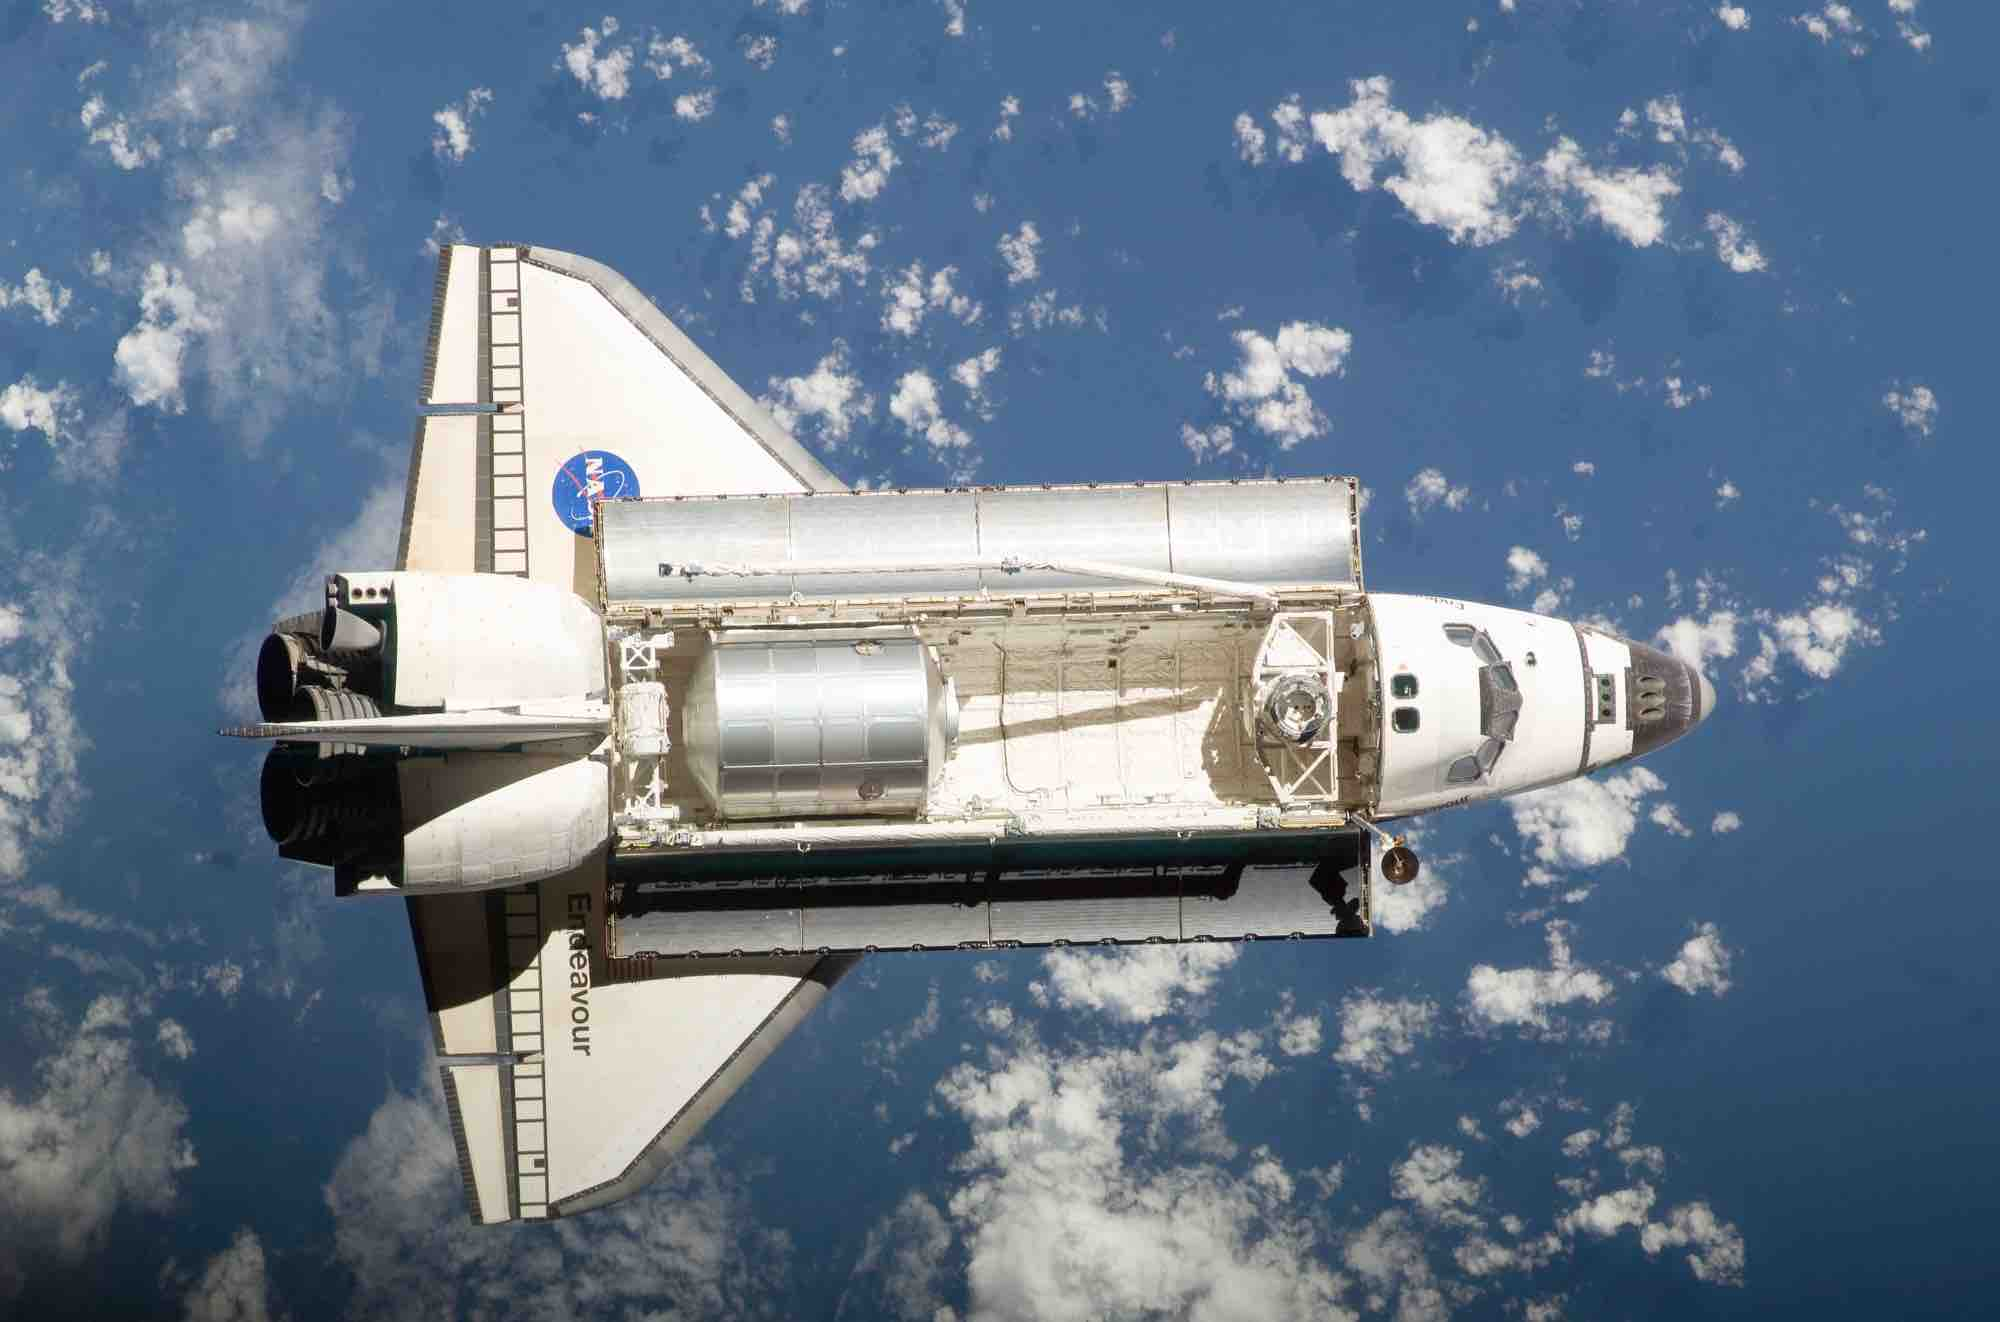

Figura 1: Um veículo espacial. Fonte: PxHere. Disponível em: https://get.pxhere.com/g. Acesso em: 24 nov. 2021. 

O sistema de controle de atitude de um veículo espacial é representado pela composição em realimentação unitária, cujo ganho direto é composto pela função de transferência de um controlador $G(s) = \frac{10^8(s+1)}{s+9}$ e a função de transferência do processo $H(s) = \frac{1}{Js^2}$, em que $J$ é o momento de inércia do veículo espacial. 

(a) (1.0 ponto) (Cálculos à mão) Apresente o diagrama de blocos do sistema de controle e determine a função de transferência de malha fechada. 

(b) (1.0 ponto) No início da missão do veículo espacial, o valor nominal de $J$ é $J_{n} = 10^8$ kg m$^2$, mas o valor de $J$ muda ao longo do tempo, pois o veículo perde combustível. Compare a resposta do sistema de controle em malha fechada para o valor nominal $J_n$, 70% de $J_n$, e 40% de $J_n$: para cada valor de $J$, apresente o mapa de polos e zeros da função de transferência de malha fechada e simule o sistema em malha fechada para uma entrada em degrau de $15^\circ$. 

(c) (0.5 ponto) Quais são as suas conclusões sobre o regime transitório e o regime permanente para cada valor de $J$?

✅***Resposta letra A - Calculos à mão em anexo no Google Sala de Aula no arquivo .pdf***

In [25]:
#Resposta letra A - Filipe Soares Donato
#Importar bibliotecas
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt

#Criar as variáveis
s = tf('s')
J = 10**8                          #valor inicial de J dado na questão
G = ((10**8)*(s+1))/(s+9)          #Função G(s)
print('Função G(s) = ', G)         #Imprime G(s)
H = 1 / (J*s**2)                   #Função H(s)
print('Função H(s) = ', H)         #Imprime H(s)
GxH = series(G,H)                  #Função trasnferência de G vezes H
T = feedback(GxH, 1, sign=-1)      #Função trasnferência final T(s)
print('Função transferência da malha fechada T(s) = ', T)
#Se aparecer 1e+08 siginifica 10^8 o que está correto
print('A função de transferência no código foi igual a da resposta à mão.')



Função G(s) =  
1e+08 s + 1e+08
---------------
     s + 9

Função H(s) =  
    1
---------
1e+08 s^2

Função transferência da malha fechada T(s) =  
            1e+08 s + 1e+08
---------------------------------------
1e+08 s^3 + 9e+08 s^2 + 1e+08 s + 1e+08

A função de transferência no código foi igual a da resposta à mão.


✅***Resposta letra B - Encontrar os diagramas de zeros e pólos***

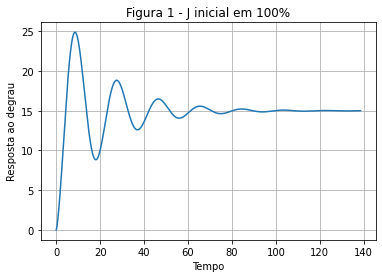



Zeros do sistema: [-1.]
Polos do sistema: [-8.90026774+0.j         -0.04986613+0.33146574j -0.04986613-0.33146574j]


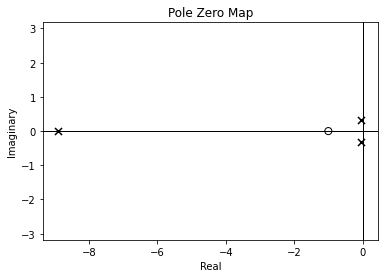

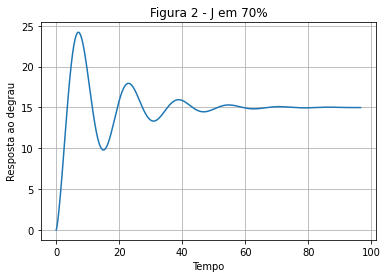



Zeros do sistema: [-1.]
Polos do sistema: [-8.85691669+0.j         -0.07154166+0.39519139j -0.07154166-0.39519139j]


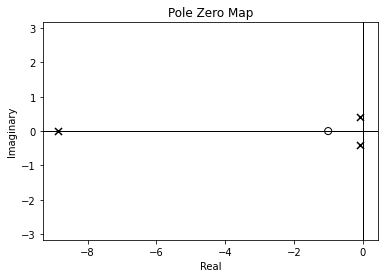

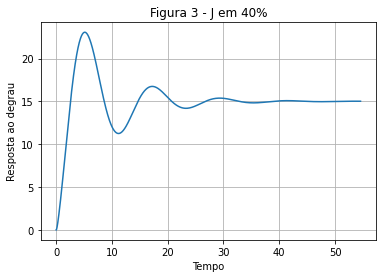



Zeros do sistema: [-1.]
Polos do sistema: [-8.74685965+0.j         -0.12657018+0.51941973j -0.12657018-0.51941973j]


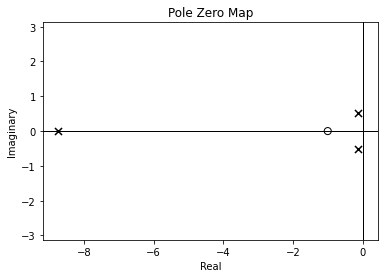

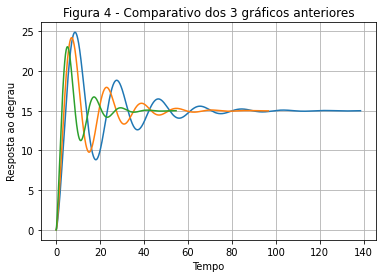

In [57]:
#Resposta letra B - Filipe Soares Donato
#As bibliotecas já foram importadas e as variáveis e fórmulas criadas
#Vamos considerar a entrada em degrau de 15°
y,t = step(15*T) 
#Vamos plotar a figura 1
plt.figure(1)
plt.plot(t,y)
plt.grid(True)
plt.title('Figura 1 - J inicial em 100%')
plt.xlabel('Tempo') 
plt.ylabel('Resposta ao degrau')
plt.show()
#O diagrama de polos e zeros está abaixo
print('\n')                                 #Pular linha
print('Zeros do sistema:', zero(T))         #Zeros da função T
print('Polos do sistema:', pole(T))         #Pólos da função T
p, z = pzmap(T)                             #Gráfico


#Vamos fazer agora o cálculo para J em 70%
J1 = 0.7*(10**8)
H1 = 1 / (J1*(s**2))             #Daí H vai mudar pois a função contém o J nela
GxH1 = series(G, H1)             #Consequentemente muda também a função G vezes H
T1 = feedback(GxH1, 1, sign=-1)  #Aqui também vai mudar o resultado
y1,t1 = step(15*T1)
#Vamos plotar a figura 2
plt.figure(2)
plt.plot(t1,y1)
plt.grid(True)
plt.title('Figura 2 - J em 70%')
plt.xlabel('Tempo') 
plt.ylabel('Resposta ao degrau')
plt.show()
#O diagrama de polos e zeros está abaixo
print('\n')                               #Pular linha
print('Zeros do sistema:', zero(T1))      #Zeros da função T
print('Polos do sistema:', pole(T1))      #Pólos da função T
p, z = pzmap(T1)   

#Vamos fazer agora o cálculo para J em 40%
J2 = 0.4*(10**8)
H2 = 1 / (J2*(s**2))             #Daí H vai mudar pois a função contém o J nela
GxH2 = series(G, H2)             #Consequentemente muda também a função G vezes H
T2 = feedback(GxH2, 1, sign=-1)  #Aqui também vai mudar o resultado
y2,t2 = step(15*T2)
#Vamos plotar a figura 3
plt.figure(3)
plt.plot(t2,y2)
plt.grid(True)
plt.title('Figura 3 - J em 40%')
plt.xlabel('Tempo') 
plt.ylabel('Resposta ao degrau')
plt.show()
#O diagrama de polos e zeros está abaixo
print('\n')                               #Pular linha
print('Zeros do sistema:', zero(T2))      #Zeros da função T
print('Polos do sistema:', pole(T2))      #Pólos da função T
p, z = pzmap(T2)   

#Vamos plotar as 3 figuras juntas pra ver a diferença agora
plt.figure(4)
plt.plot(t,y, t1,y1, t2,y2)
plt.grid(True)
plt.title('Figura 4 - Comparativo dos 3 gráficos anteriores')
plt.xlabel('Tempo') 
plt.ylabel('Resposta ao degrau')
plt.show()
#FIM do código



✅***Resposta letra C - Coclusões***


Olhando o gráfico da Figura 4, percebi que ao diminuir o valor de Jn(*momento de inércia do veículo espacial*) o tempo que é preciso para o sistema alcançar o regime permanente é menor.

Também percebi que as senoides do regime transitório são diferentes devido a alteração no polinômio no denominador o que resulta nessa mudança nos polos do sistema.
